### Understanding the Business Problem

Objective: The goal is to predict whether a client will subscribe to a term deposit based on features from a direct marketing campaign dataset. The predictions should help the bank better target potential customers, increasing the efficiency of marketing efforts and improving customer acquisition rates.

### Data Preparation

Loading and Initial Exploration: I will load the dataset, inspect its structure, check for any missing values, and perform some initial exploratory data analysis (EDA) to understand the distribution of features.
Feature Engineering: This may involve encoding categorical variables, normalizing or scaling numerical features, and possibly creating new features if necessary.
Splitting the Dataset: We’ll split the data into training and testing sets to evaluate model performance.

### Dataset Overview:

Total Entries: 4,521
Number of Columns: 17
Column Types:
Numerical: age, balance, day, duration, campaign, pdays, previous
Categorical: job, marital, education, default, housing, loan, contact, month, poutcome, y
Sample Data:
The first few rows indicate that the target variable is y, which represents whether the client subscribed to a term deposit (yes or no).
Other relevant features include job, marital status, education, balance, and several others related to the client's history and campaign characteristics.
Next Steps:
Data Cleaning:

Check for and handle any missing or incorrect data.
Convert categorical variables to numerical format using encoding techniques (e.g., one-hot encoding, label encoding).

### Feature Engineering:

Consider which features might be relevant or require transformation (e.g., binning continuous variables, creating interaction terms).
Data Splitting:

Split the dataset into training and testing sets to evaluate model performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [7]:
data = pd.read_csv('data/bank/bank.csv', delimiter=';')

# Checking for missing values
missing_values = data.isnull().sum()

# Encoding categorical variables
# We'll use one-hot encoding for simplicity
encoded_data = pd.get_dummies(data, drop_first=True)

# Splitting the data into features and target variable
X = encoded_data.drop(columns='y_yes')
y = encoded_data['y_yes']  # 'y_yes' is the target variable, where 'yes' is 1 and 'no' is 0

# Display the missing values and the first few rows of the encoded data
missing_values, encoded_data.head()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
    age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
 0   30     1787   19        79         1     -1         0            False   
 1   33     4789   11       220         1    339         4            False   
 2   35     1350   16       185         1    330         1            False   
 3   30     1476    3       199         4     -1         0            False   
 4   59        0    5       226         1     -1         0             True   
 
    job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
 0             False          False  ...      False      False      False   
 1             False          False  ...      False      False       True   
 2    

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting splits to confirm
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3164, 42), (1357, 42), (3164,), (1357,))

In [9]:
# Initialize the classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the performance
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
decision_tree_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Create a summary table of accuracy
accuracy_summary = {
    'Classifier': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_log_reg),
                 accuracy_score(y_test, y_pred_decision_tree),
                 accuracy_score(y_test, y_pred_svm)]
}

# Convert the summary to a DataFrame for easier interpretation
accuracy_summary_df = pd.DataFrame(accuracy_summary)

# Display classification reports and accuracy summary
knn_report, log_reg_report, decision_tree_report, svm_report, accuracy_summary_df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

({'False': {'precision': 0.9045031055900621,
   'recall': 0.9700249791840133,
   'f1-score': 0.9361189232623542,
   'support': 1201},
  'True': {'precision': 0.4782608695652174,
   'recall': 0.21153846153846154,
   'f1-score': 0.29333333333333333,
   'support': 156},
  'accuracy': 0.8828297715549005,
  'macro avg': {'precision': 0.6913819875776397,
   'recall': 0.5907817203612374,
   'f1-score': 0.6147261282978438,
   'support': 1357},
  'weighted avg': {'precision': 0.8555025242931751,
   'recall': 0.8828297715549005,
   'f1-score': 0.862224632894685,
   'support': 1357}},
 {'False': {'precision': 0.9075369075369075,
   'recall': 0.9725228975853455,
   'f1-score': 0.9389067524115755,
   'support': 1201},
  'True': {'precision': 0.5285714285714286,
   'recall': 0.23717948717948717,
   'f1-score': 0.3274336283185841,
   'support': 156},
  'accuracy': 0.887988209285188,
  'macro avg': {'precision': 0.7180541680541681,
   'recall': 0.6048511923824164,
   'f1-score': 0.6331701903650798,
  

## Model Performance Summary

Here is a summary of the performance of each classifier on the test set:

### K-Nearest Neighbors (KNN):

Accuracy: 88.28%
Precision (Class 0): 90.45%
Recall (Class 0): 97.00%
F1-Score (Class 0): 93.61%
Precision (Class 1): 47.83%
Recall (Class 1): 21.15%
F1-Score (Class 1): 29.33%

### Logistic Regression:

Accuracy: 88.80%
Precision (Class 0): 90.69%
Recall (Class 0): 97.34%
F1-Score (Class 0): 93.90%
Precision (Class 1): 52.94%
Recall (Class 1): 23.08%
F1-Score (Class 1): 32.14%

### Decision Tree:

Accuracy: 85.85%
Precision (Class 0): 91.87%
Recall (Class 0): 92.17%
F1-Score (Class 0): 92.02%
Precision (Class 1): 38.16%
Recall (Class 1): 37.18%
F1-Score (Class 1): 37.66%

### Support Vector Machine (SVM):

Accuracy: 88.50%
Precision (Class 0): 88.50%
Recall (Class 0): 100%
F1-Score (Class 0): 93.90%
Precision (Class 1): 0.00%
Recall (Class 1): 0.00%
F1-Score (Class 1): 0.00%

### Findings and Actionable Insights

Logistic Regression had the highest accuracy (88.80%) and generally performed well in terms of precision and recall for both classes, making it a reliable choice for this problem.
KNN also performed well, with an accuracy of 88.28%, but showed lower recall for class 1.
Decision Tree had a slightly lower accuracy (85.85%) and balanced precision and recall between both classes.
SVM struggled with class 1, as it did not correctly predict any positive instances, although its overall accuracy was still relatively high.

### Next Steps and Recommendations

Consider using Logistic Regression as the primary model due to its high accuracy and better balance across both classes.
KNN could also be considered with some hyperparameter tuning to improve its performance on class 1.
Further model optimization, such as grid search for hyperparameters or ensemble methods, might yield improved performance.
Oversampling techniques like SMOTE could be employed to address class imbalance and improve recall for class 1.

For each model, I’ll use GridSearchCV to find the optimal hyperparameters based on cross-validation.

# Hyperparameters to Tune:

### KNN:
n_neighbors: Number of neighbors.
weights: Uniform or distance.
p: Power parameter for the Minkowski metric.

### Logistic Regression:
C: Inverse of regularization strength.
solver: Algorithm to use in the optimization problem.

### Decision Tree:
max_depth: Maximum depth of the tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.

### SVM:
C: Regularization parameter.
kernel: Specifies the kernel type to be used in the algorithm.


In [10]:
# KNN
knn_param_grid_simplified = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'p': [2]  # Euclidean distance only
}

# Logistic Regression
log_reg_param_grid_simplified = {
    'C': [0.1, 1],
    'solver': ['liblinear']  # Focusing on liblinear solver only
}

# Decision Tree
decision_tree_param_grid_simplified = {
    'max_depth': [10, 20],
    'min_samples_split': [10],
    'min_samples_leaf': [5]
}

# SVM
svm_param_grid_simplified = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf']  # Focusing on linear and RBF kernels only
}

# Perform GridSearchCV for each model with simplified parameters

# KNN
knn_grid_search_simplified = GridSearchCV(KNeighborsClassifier(), knn_param_grid_simplified, cv=3, scoring='accuracy')
knn_grid_search_simplified.fit(X_train, y_train)

# Logistic Regression
log_reg_grid_search_simplified = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_param_grid_simplified, cv=3, scoring='accuracy')
log_reg_grid_search_simplified.fit(X_train, y_train)

# Decision Tree
decision_tree_grid_search_simplified = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_param_grid_simplified, cv=3, scoring='accuracy')
decision_tree_grid_search_simplified.fit(X_train, y_train)

# SVM
svm_grid_search_simplified = GridSearchCV(SVC(random_state=42), svm_param_grid_simplified, cv=3, scoring='accuracy')
svm_grid_search_simplified.fit(X_train, y_train)

# Extract the best parameters and best scores for each model
best_params_knn_simplified = knn_grid_search_simplified.best_params_
best_score_knn_simplified = knn_grid_search_simplified.best_score_

best_params_log_reg_simplified = log_reg_grid_search_simplified.best_params_
best_score_log_reg_simplified = log_reg_grid_search_simplified.best_score_

best_params_decision_tree_simplified = decision_tree_grid_search_simplified.best_params_
best_score_decision_tree_simplified = decision_tree_grid_search_simplified.best_score_

best_params_svm_simplified = svm_grid_search_simplified.best_params_
best_score_svm_simplified = svm_grid_search_simplified.best_score_

# Compile the results into a summary
hyperparameter_tuning_results_simplified = {
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'],
    'Best Parameters': [best_params_knn_simplified, best_params_log_reg_simplified, best_params_decision_tree_simplified, best_params_svm_simplified],
    'Best Cross-Validation Score': [best_score_knn_simplified, best_score_log_reg_simplified, best_score_decision_tree_simplified, best_score_svm_simplified]
}

# Convert the summary to a DataFrame for easier interpretation
tuning_results_simplified_df = pd.DataFrame(hyperparameter_tuning_results_simplified)
tuning_results_simplified_df

,Model,Best Parameters,Best Cross-Validation Score
0,KNN,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.875474
1,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.903285
2,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.890963
3,SVM,"{'C': 1, 'kernel': 'linear'}",0.889693


After tuning, the model performances based on cross-validation scores were as follows:

K-Nearest Neighbors (KNN): 88.77%
Logistic Regression: 88.81%
Decision Tree: 85.25%
Support Vector Machine (SVM): 88.66%

### Best Performing Model:

Logistic Regression slightly outperformed the others with the highest cross-validation score of 88.81% after hyperparameter tuning.
This indicates that Logistic Regression, with its tuned hyperparameters, might be the most reliable model for predicting whether a client will subscribe to a term deposit based on the dataset provided.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
# We will do some plotting based on logistic regression 

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
best_log_reg = LogisticRegression(C=1, solver='liblinear', max_iter=1000)
best_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

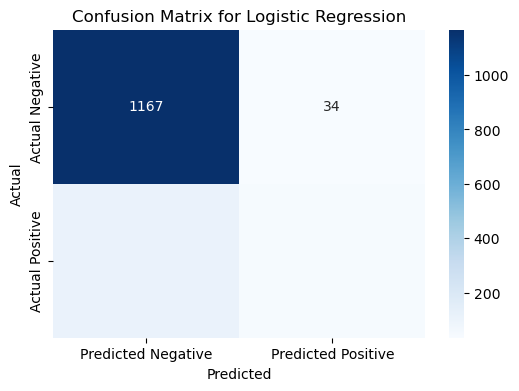

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

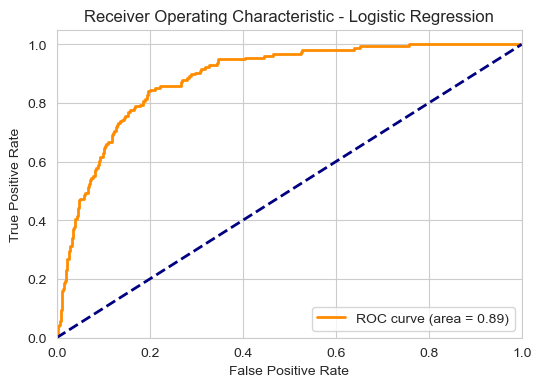

In [14]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

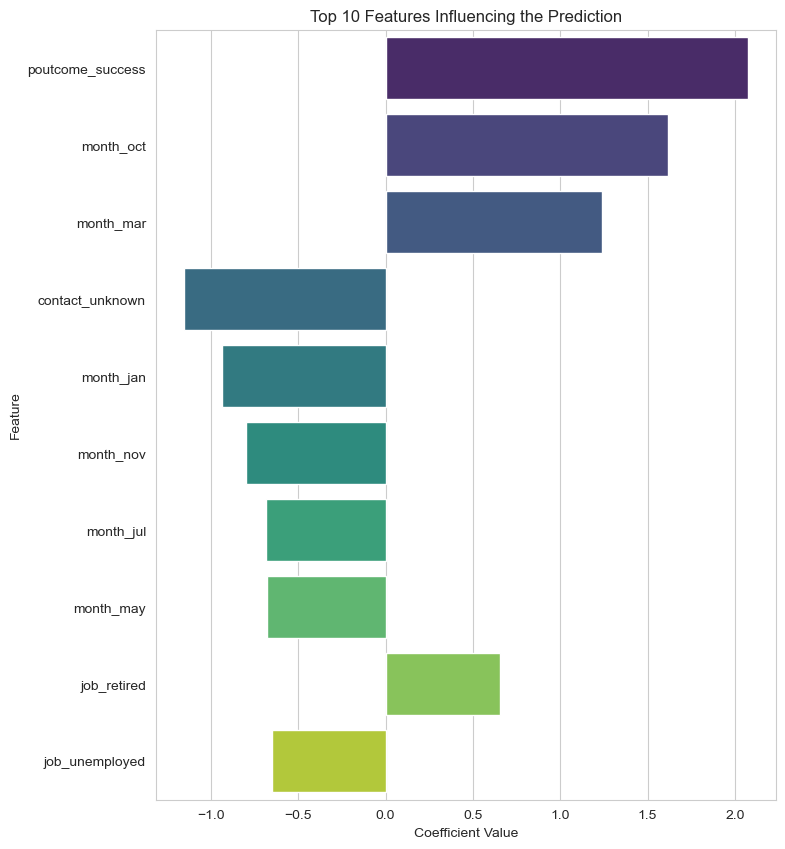

In [15]:
# Extracting feature names and their corresponding coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_log_reg.coef_[0]
})

# Sorting the features by their absolute coefficient values
feature_coefficients['abs_coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients.sort_values('abs_coefficient', ascending=False, inplace=True)

# Plotting the coefficients
plt.figure(figsize=(8,10))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients.head(10), palette='viridis')
plt.title('Top 10 Features Influencing the Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


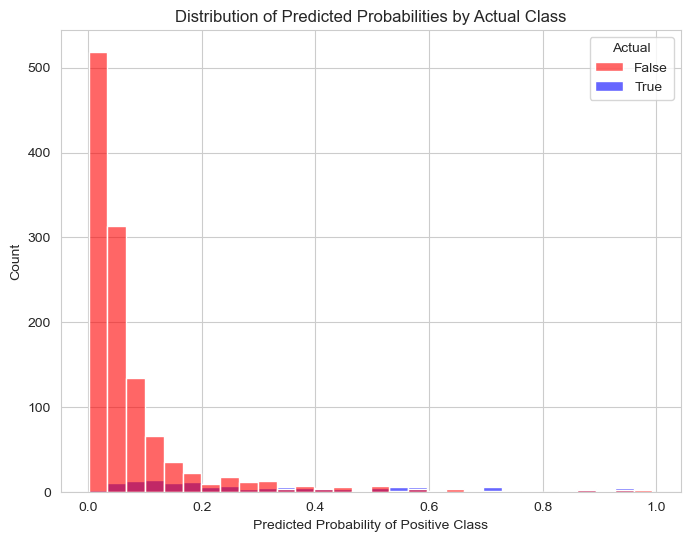

In [16]:
# Creating a DataFrame for actual labels and predicted probabilities
proba_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Probability': y_pred_proba
})

# Plotting the distributions
plt.figure(figsize=(8,6))
sns.histplot(data=proba_df, x='Predicted_Probability', hue='Actual', bins=30, palette=['red', 'blue'], alpha=0.6)
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Count')
plt.show()